<a href="https://colab.research.google.com/github/tanmy-sharma/Jak2Biotech/blob/main/FeatureEngineeringTake2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample Feature Extraction Notebook

**Goal** : Reduce the amount of features to a range between 15-50 using acceptable machine learning protocols.

In [1]:
# basic computation libraries
import numpy as np
import pandas as pd

#basic plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# examining missing values in graphical form
import missingno as msno

## Importing the dataset

In [2]:
df = pd.read_csv('/content/jak2train.csv')
df.head().T

,0,1,2,3,4
name,C1=CC=C(C=C1)C(=O)OC2=CC=CC3=C2C=CC=C3O,CCCN1C(=NC2=C1C(=O)N(C(=O)N2C)C)CN(C)CC3=CC=CC=C3,C1=CC=C(C=C1)CCCNC(=O)/C(=C/C2=CC(=C(C=C2)O)O)...,C1=CC=C(C=C1)CCCNC(=O)/C(=C/C2=CC(=C(C=C2)O)O)...,C1CCC2(CC1)N=C3C=C(C=CC3=[N+]2[O-])NC4=CC=CC=C4
cls,1,1,1,1,1
ABC,NaN,NaN,NaN,NaN,NaN
ABCGG,NaN,NaN,NaN,NaN,NaN
nAcid,0,0,0,0,0
...,...,...,...,...,...
WPol,31,44,32,32,36
Zagreb1,104,136,114,114,122
Zagreb2,122.0,163.0,127.0,127.0,147.0
mZagreb1,5.666667,9.611111,8.166667,8.166667,5.368056


Initial number of features : 1615

Features to remove : 1565

## Feature Extraction

#### Basic Steps to follow:

1. Remove all the columns which have more than 70% null values.
2. Remove all the columns which only have a unique value.
3. Remove all the columns which have a variance of zero.

In [3]:
null_threshold = len(df) * 0.3 # 70% threshold

df_cleaned = df.dropna(axis = 1, thresh = null_threshold)
df_cleaned.shape

(9440, 1458)

In [4]:
print('Number of features removed : {}'.format(df.shape[1] - df_cleaned.shape[1]))

Number of features removed : 157


In [5]:
feature_with_unique_value = []

for i in df_cleaned.columns:
    if len(df_cleaned[i].unique()) == 1:
        feature_with_unique_value.append(i)

feature_with_unique_value

['NsLi',
 'NssBe',
 'NssssBe',
 'NssBH',
 'NsssB',
 'NssNH2',
 'NsssNH',
 'NsSiH3',
 'NssSiH2',
 'NsssSiH',
 'NssssSi',
 'NsPH2',
 'NssPH',
 'NsssssP',
 'NsSH',
 'NsGeH3',
 'NssGeH2',
 'NsssGeH',
 'NssssGe',
 'NsAsH2',
 'NssAsH',
 'NsssAs',
 'NsssdAs',
 'NsssssAs',
 'NsSeH',
 'NdSe',
 'NssSe',
 'NaaSe',
 'NdssSe',
 'NddssSe',
 'NsSnH3',
 'NssSnH2',
 'NsssSnH',
 'NssssSn',
 'NsPbH3',
 'NssPbH2',
 'NsssPbH',
 'NssssPb',
 'SsLi',
 'SssBe',
 'SssssBe',
 'SssBH',
 'SsssB',
 'SssNH2',
 'SsssNH',
 'SsSiH3',
 'SssSiH2',
 'SsssSiH',
 'SssssSi',
 'SsPH2',
 'SssPH',
 'SsssssP',
 'SsSH',
 'SsGeH3',
 'SssGeH2',
 'SsssGeH',
 'SssssGe',
 'SsAsH2',
 'SssAsH',
 'SsssAs',
 'SsssdAs',
 'SsssssAs',
 'SsSeH',
 'SdSe',
 'SssSe',
 'SaaSe',
 'SdssSe',
 'SddssSe',
 'SsSnH3',
 'SssSnH2',
 'SsssSnH',
 'SssssSn',
 'SsPbH3',
 'SssPbH2',
 'SsssPbH',
 'n10Ring',
 'n10HRing',
 'n11HRing',
 'n3aRing',
 'n8aRing',
 'n9aRing',
 'n10aRing',
 'n11aRing',
 'n12aRing',
 'n3aHRing',
 'n7aHRing',
 'n8aHRing',
 'n9aHRing',
 'n

In [6]:
df_cleaned = df_cleaned.drop(feature_with_unique_value, axis = 1)

In [7]:
print('Number of features removed : {}'.format(len(feature_with_unique_value)))
print('Total number of features removed : {}'.format(df.shape[1] - df_cleaned.shape[1]))

Number of features removed : 112
Total number of features removed : 269


In [8]:
df_cleaned.shape

(9440, 1346)

In [9]:
df_cleaned = df_cleaned.drop(['name'], axis = 1)

In [10]:
zero_variance_columns = df_cleaned.columns[df_cleaned.var() == 0]
zero_variance_columns

Index(['SssssPb'], dtype='object')

In [11]:
df_cleaned = df_cleaned.drop(zero_variance_columns, axis = 1)

In [12]:
print('Number of features removed : {}'.format(len(zero_variance_columns)))
print('Total number of features removed : {}'.format(df.shape[1] - df_cleaned.shape[1]))

Number of features removed : 1
Total number of features removed : 271


#### Replacement of null values

Now since we still have an astronomical amount of features left with us, we cannot decide which metric is best for us for the null values to get replaced by. So, we are going to make 2 separate datasets, one which will have values replaced by the mean, and one by the median.

In [13]:
percentage_null = (df_cleaned.isnull().sum().sum() / (df_cleaned.shape[0] * df_cleaned.shape[1])) * 100

print(f"Percentage of null values in the entire dataset: {percentage_null:.2f}%")

Percentage of null values in the entire dataset: 3.33%


In [14]:
df_mean = df_cleaned.fillna(df_cleaned.mean())
df_median = df_cleaned.fillna(df_cleaned.median())

In [15]:
dict = {'df_mean' : df_mean, 'df_median' : df_median}

In [16]:
for j, i in dict.items():
    percentage_null = (i.isnull().sum().sum() / (i.shape[0] * i.shape[1])) * 100

    print("Percentage of null values in the {} dataset: {}".format(j, percentage_null))

Percentage of null values in the df_mean dataset: 0.0
Percentage of null values in the df_median dataset: 0.0


In [17]:
!pip install featurewiz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 37.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of lazytransform to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.2 MB/s 

In [18]:
from featurewiz import featurewiz

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (9440, 1344)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E

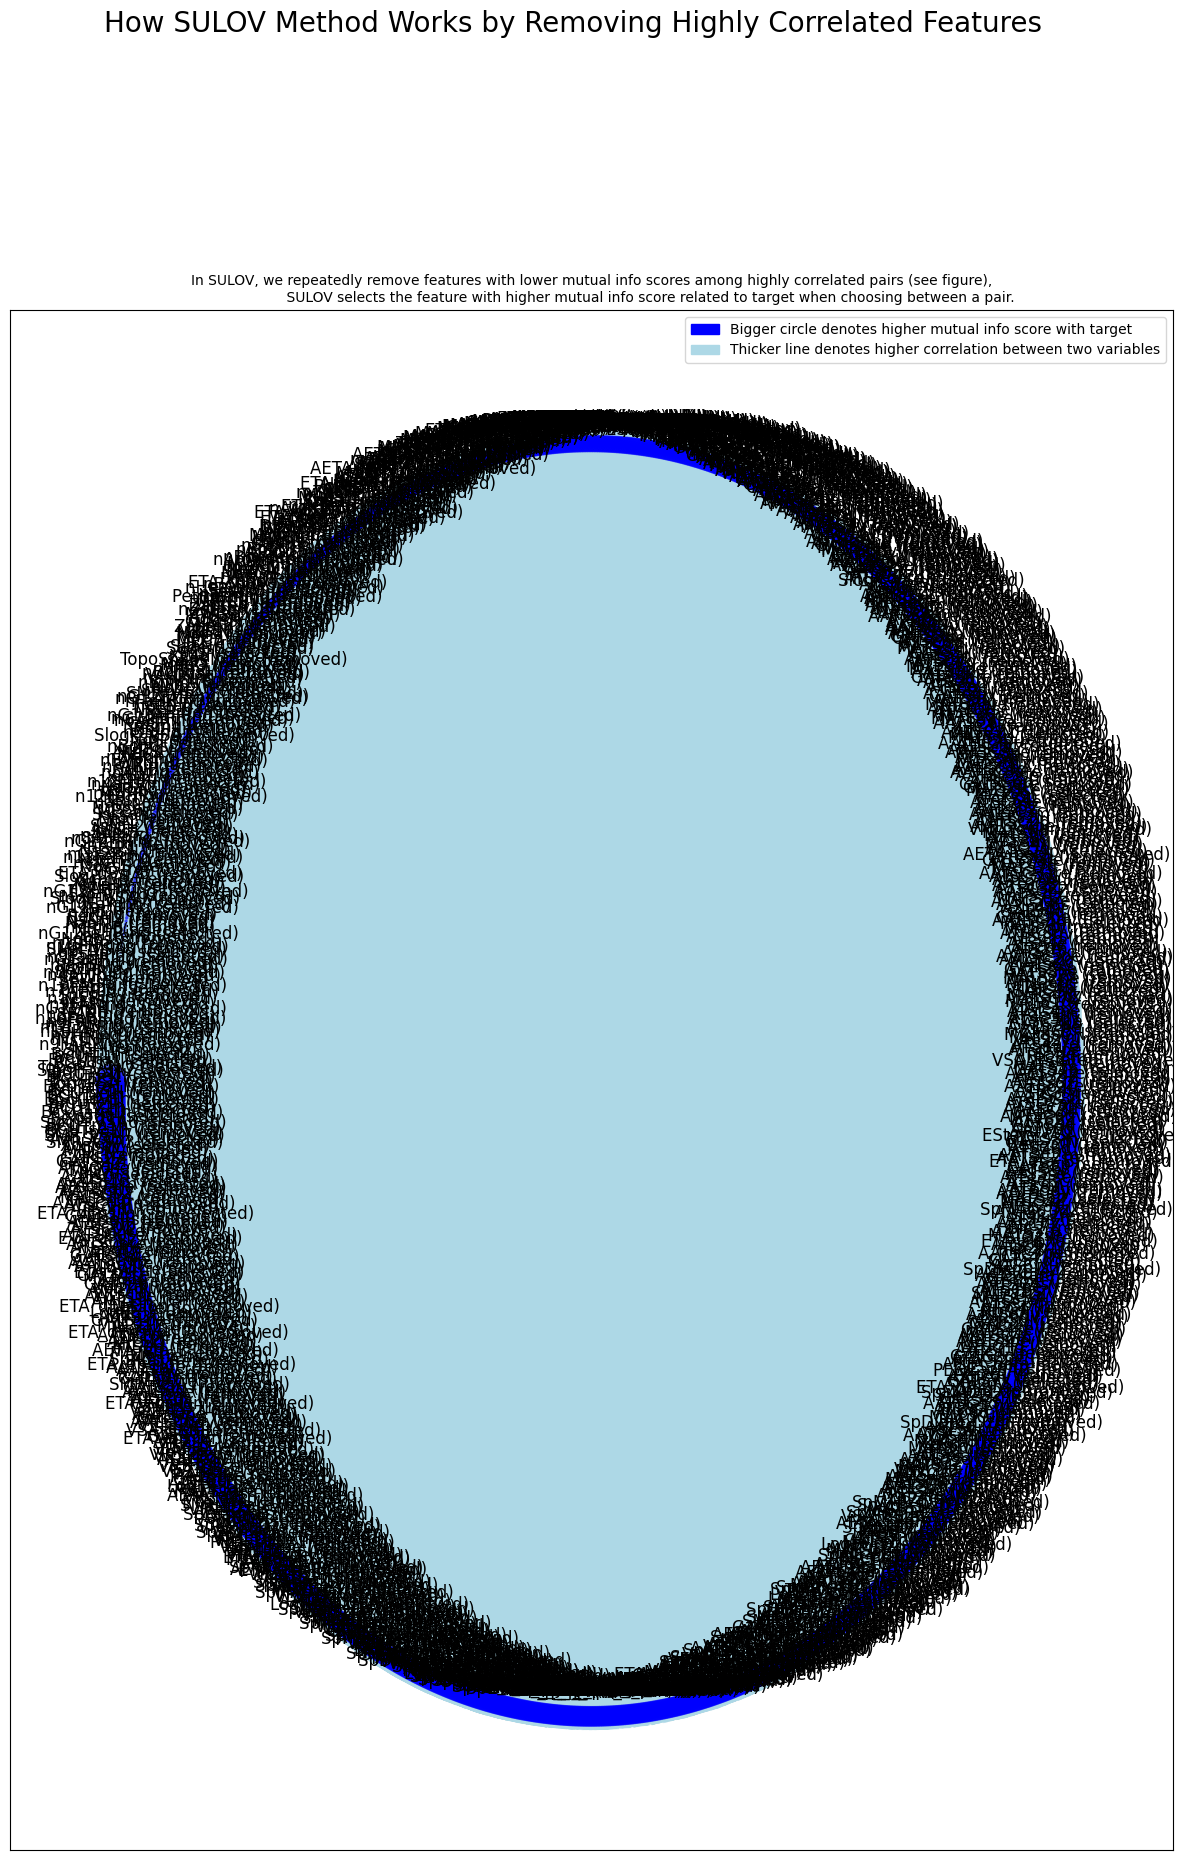

Time taken for SULOV method = 177 seconds
    Adding 0 categorical variables to reduced numeric variables  of 380
Finally 380 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 268 features per iteration...
    XGBoost version using 1.7.6 as tree method: gpu_hist
    Number of booster rounds = 100
            Time taken for regular XGBoost feature selection = 48 seconds
            Time taken for regular XGBoost feature selection = 40 seconds
            Time taken for regular XGBoost feature selection = 31 seconds
            Time taken for regular XGBoost feature selection = 20 seconds
            Time taken for regular XGBoost feature selection 

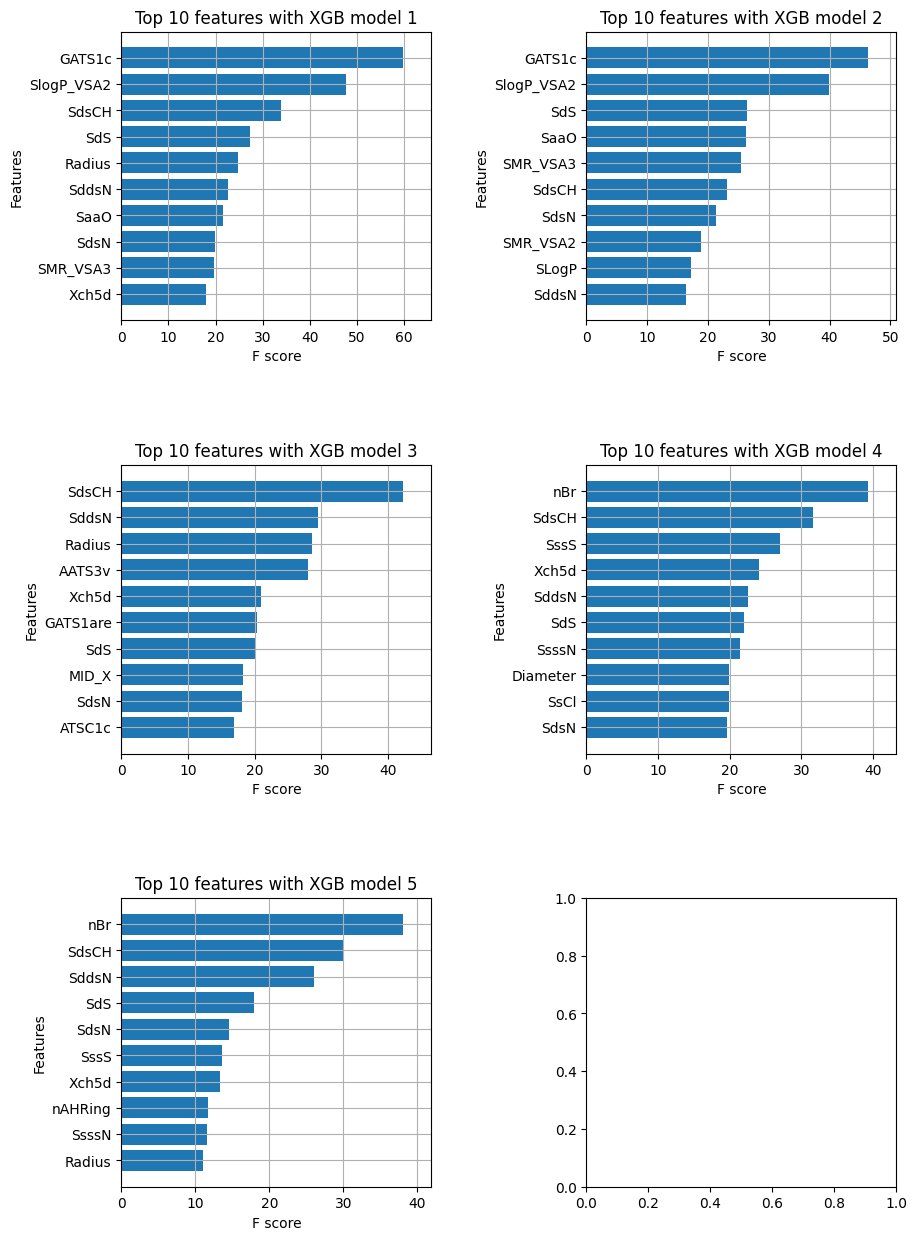

    Completed XGBoost feature selection in 6 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 315 important features. Too many to print...
Total Time taken for featurewiz selection = 323 seconds
Output contains a list of 315 important features and a train dataframe


In [19]:
df_median_fwiz = featurewiz(df_median, 'cls', corr_limit=0.70, verbose=2)

In [20]:
len(df_median_fwiz[0])

315

In [21]:
df_median_fwiz[1]

,GATS1c,SlogP_VSA2,SLogP,SdsCH,SMR_VSA3,GATS1s,SaaO,SdsN,MATS1s,PEOE_VSA12,...,n10FAHRing,NdCH2,SdssS,n4ARing,SssssN,n7ARing,n12FHRing,n3Ring,nG12ARing,cls
0,1.465955,11.075833,3.76460,0.000000,0.000000,0.743835,0.000000,0.000000,-0.124864,0.000000,...,0,0,0.0,0,0.0,0,0,0,0,1
1,1.809662,30.632859,1.47570,0.000000,23.585187,0.538339,0.000000,0.000000,-0.028630,0.000000,...,0,0,0.0,0,0.0,0,0,0,0,1
2,1.456171,22.664991,2.75378,1.366755,5.316789,0.742746,0.000000,0.000000,-0.078430,0.000000,...,0,0,0.0,0,0.0,0,0,0,0,1
3,1.456171,22.664991,2.75378,1.366755,5.316789,0.742746,0.000000,0.000000,-0.078430,0.000000,...,0,0,0.0,0,0.0,0,0,0,0,1
4,1.001737,5.662860,2.71270,0.000000,4.738834,0.524510,0.000000,4.799319,-0.011661,5.357230,...,0,0,0.0,0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9435,1.542939,27.781441,4.41042,0.000000,14.764463,0.690051,0.000000,0.000000,-0.077075,0.000000,...,0,0,0.0,0,0.0,0,0,0,0,0
9436,1.607400,23.024800,4.98084,0.000000,9.883888,0.584523,5.449994,0.000000,-0.050872,0.000000,...,0,0,0.0,0,0.0,0,0,0,0,0
9437,1.550834,41.312013,2.76280,2.028977,4.899910,0.537848,0.000000,0.000000,-0.038532,17.721539,...,1,0,0.0,0,0.0,0,0,0,0,0
9438,1.426312,32.721317,2.11670,0.000000,25.524044,0.596461,0.000000,0.000000,-0.009704,11.731584,...,0,0,0.0,0,0.0,0,0,0,0,0


In [26]:
y_train = df_median_fwiz[1]['cls']
X_train = df_median_fwiz[1].drop(['cls'], axis = 1)

In [28]:
df_test = pd.read_csv('/content/jak2test.csv')

In [29]:
df_test_median = df_test[df_median_fwiz[0]]
df_test_median.isna().sum().sum()

40779

In [33]:
df_test_median = df_test_median.fillna(df_test_median.median())
df_test_median.isna().sum().sum()

0

In [36]:
X_test = df_test_median
y_test = df_test['cls']

In [37]:
X_train.shape

(9440, 315)

In [38]:
y_train.shape

(9440,)

In [39]:
X_test.shape

(2360, 315)

In [40]:
y_test.shape

(2360,)

In [41]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.fit_transform(X_test)

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [77]:
model = Sequential()
model.add(Flatten(input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# model.add(Dropout(0.5))
# model.add(Dense(units=256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(units=1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 315)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                20224     
                                                                 
 batch_normalization_12 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 1024)              66560     
                                                                 
 batch_normalization_13 (Ba  (None, 1024)              4096      
 tchNormalization)                                    

In [78]:
optimizer = SGD(learning_rate=0.01, momentum = 0.8, nesterov=True)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.15, patience=5, min_lr=1e-6, verbose=1)

In [83]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.15, callbacks=[early_stopping, reduce_lr])

Epoch 1/100
126/126 [==============================] - 1s 11ms/step - loss: 0.2440 - accuracy: 0.9009 - val_loss: 0.2540 - val_accuracy: 0.9004 - lr: 1.0000e-06
Epoch 2/100
126/126 [==============================] - 1s 8ms/step - loss: 0.2445 - accuracy: 0.9000 - val_loss: 0.2574 - val_accuracy: 0.8983 - lr: 1.0000e-06
Epoch 3/100
126/126 [==============================] - 1s 6ms/step - loss: 0.2440 - accuracy: 0.8989 - val_loss: 0.2570 - val_accuracy: 0.8997 - lr: 1.0000e-06
Epoch 4/100
126/126 [==============================] - 1s 6ms/step - loss: 0.2395 - accuracy: 0.9022 - val_loss: 0.2545 - val_accuracy: 0.9011 - lr: 1.0000e-06
Epoch 5/100
126/126 [==============================] - 1s 7ms/step - loss: 0.2489 - accuracy: 0.8946 - val_loss: 0.2502 - val_accuracy: 0.9047 - lr: 1.0000e-06
Epoch 6/100
126/126 [==============================] - 1s 6ms/step - loss: 0.2347 - accuracy: 0.9050 - val_loss: 0.2508 - val_accuracy: 0.9032 - lr: 1.0000e-06
Epoch 7/100
126/126 [==================

In [84]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

236/236 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.8911
Test score: 0.281687468290329
Test accuracy: 0.8911017179489136


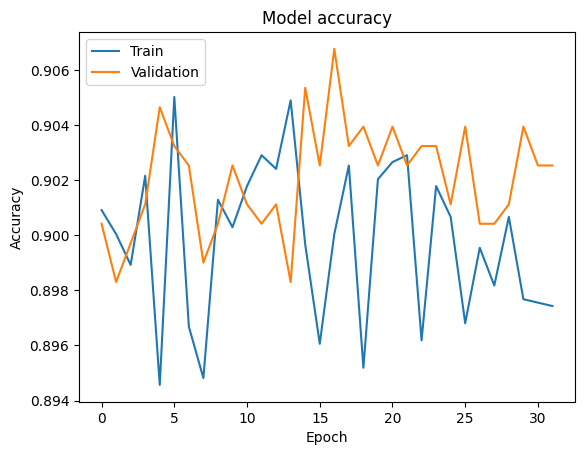

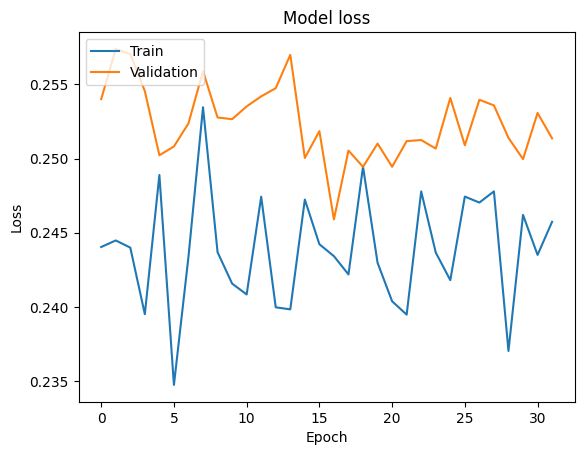

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [102]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

skb_50 = SelectKBest(chi2, k=50)

In [114]:
X_skb_50 = pd.concat([df_median_fwiz[1].drop(['cls'], axis=1), df_test_median])
y_skb_50 = pd.concat([df_median_fwiz[1]['cls'], df_test['cls']])

In [115]:
X_skb_50 = MinMaxScaler().fit_transform(X_skb_50)
k_best_selector = SelectKBest(chi2, k=50)
X_kbest_50 = k_best_selector.fit_transform(X_skb_50, y_skb_50)

In [122]:
X_kbest_50_train, X_kbest_50_test, y_skb_50_train, y_skb_50_test = train_test_split(X_kbest_50, y_skb_50, stratify = y_skb_50, random_state = 42, test_size = 0.25)

In [141]:
model_kbest_50 = Sequential()
model_kbest_50.add(Flatten(input_dim=X_kbest_50_train.shape[1]))
model_kbest_50.add(Dense(units=64, activation='relu'))
model_kbest_50.add(BatchNormalization())
model_kbest_50.add(Dropout(0.3))
# model_kbest_50.add(Dropout(0.5))
# model_kbest_50.add(Dense(units=256, activation='relu'))
# model_kbest_50.add(BatchNormalization())
# model_kbest_50.add(Dropout(0.5))
model_kbest_50.add(Dense(units=1024, activation='relu'))
model_kbest_50.add(BatchNormalization())
model_kbest_50.add(Dropout(0.5))
model_kbest_50.add(Dense(units=1, activation='sigmoid'))
model_kbest_50.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 50)                0         
                                                                 
 dense_29 (Dense)            (None, 64)                3264      
                                                                 
 batch_normalization_20 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 1024)              66560     
                                                                 
 batch_normalization_21 (Ba  (None, 1024)              4096      
 tchNormalization)                                    

In [145]:
optimizer = Adam(learning_rate=0.01)
model_kbest_50.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [146]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.20, patience=5, min_lr=1e-6, verbose=1)

In [147]:
history = model_kbest_50.fit(X_kbest_50_train, y_skb_50_train, epochs=100, batch_size=64, validation_split=0.15, callbacks=[early_stopping, reduce_lr])

Epoch 1/100
118/118 [==============================] - 6s 18ms/step - loss: 0.6794 - accuracy: 0.7195 - val_loss: 0.5241 - val_accuracy: 0.7447 - lr: 0.0100
Epoch 2/100
118/118 [==============================] - 1s 11ms/step - loss: 0.5336 - accuracy: 0.7489 - val_loss: 0.4959 - val_accuracy: 0.7809 - lr: 0.0100
Epoch 3/100
118/118 [==============================] - 2s 13ms/step - loss: 0.4932 - accuracy: 0.7689 - val_loss: 0.4709 - val_accuracy: 0.7764 - lr: 0.0100
Epoch 4/100
118/118 [==============================] - 2s 16ms/step - loss: 0.4908 - accuracy: 0.7671 - val_loss: 0.4787 - val_accuracy: 0.7922 - lr: 0.0100
Epoch 5/100
118/118 [==============================] - 2s 17ms/step - loss: 0.4813 - accuracy: 0.7779 - val_loss: 0.5683 - val_accuracy: 0.7199 - lr: 0.0100
Epoch 6/100
118/118 [==============================] - 1s 12ms/step - loss: 0.4635 - accuracy: 0.7824 - val_loss: 0.5116 - val_accuracy: 0.7741 - lr: 0.0100
Epoch 7/100
118/118 [==============================] - 1s 

In [148]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

236/236 [==============================] - 1s 3ms/step - loss: 0.2817 - accuracy: 0.8911
Test score: 0.281687468290329
Test accuracy: 0.8911017179489136


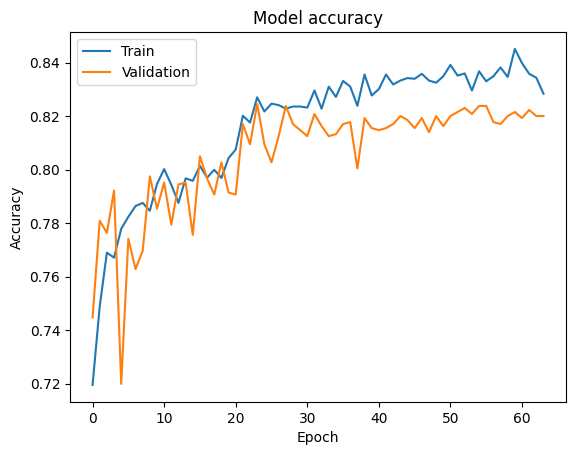

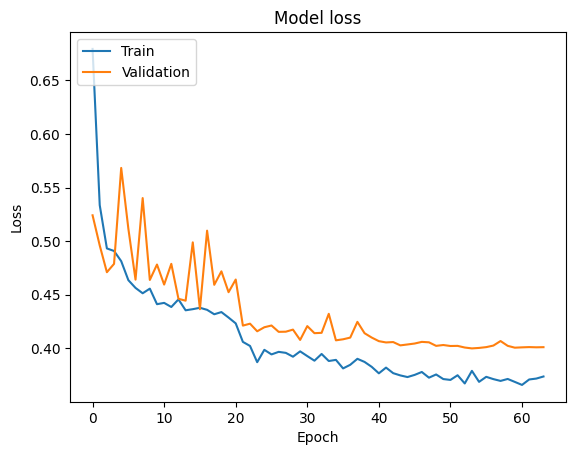

In [149]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [152]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

base_classifier = DecisionTreeClassifier(max_depth=30)
abc = AdaBoostClassifier(n_estimators=100, random_state=42, learning_rate = 0.1, base_estimator = base_classifier)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8919491525423728


In [ ]:
from sklearn.neural_network import MLPClassifier

base_classifier = MLPClassifier()